In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

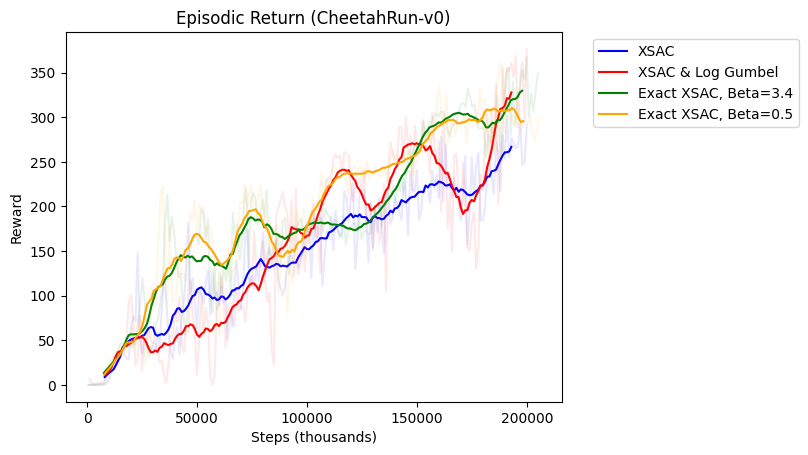

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folders and file names
target_folder = './XSAC_TEST'

folders = [folder for folder in os.listdir(target_folder) if os.path.isdir(os.path.join(target_folder, folder))]
line_colors = ['b', 'r', 'g', 'orange']
i = 0
for folder in folders:
    folder_path = os.path.join(target_folder, folder)
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Loop through each CSV file and read 'eval/reward' column
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path)
        
        # Check if 'eval/reward' column exists in the DataFrame
        if 'eval/reward' in df.columns:
            smoothed_rewards = df['eval/reward'].rolling(window=15, center=True).mean()
            
            # Plot the smoothed 'eval/reward' column
                   
            if folder == 'sac_1':
                l="XSAC"
            elif folder == 'sac_1_v3':
                l="XSAC & Log Gumbel"
            elif folder == 'sac_0_5':
                l="Exact XSAC, Beta=0.5"
            elif folder == 'xsac_3_4':
                l="Exact XSAC, Beta=3.4"
            
            plt.plot(df['time/steps'], df['eval/reward'], alpha=0.09, color=line_colors[i])

            plt.plot(df['time/steps'], smoothed_rewards, label=l, color=line_colors[i])
    i += 1

# Customize the plot
plt.title('Episodic Return (CheetahRun-v0)')
plt.xlabel('Steps (thousands)')
plt.ylabel('Reward')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

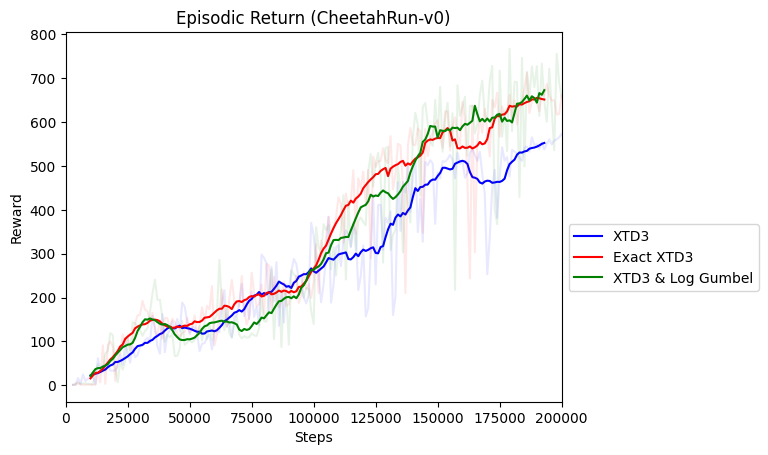

In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folders and file names
target_folder = './XTD3_TEST'
# Get all subfolders within the target folder
folders = [folder for folder in os.listdir(target_folder) if os.path.isdir(os.path.join(target_folder, folder))]

# Initialize an empty DataFrame to store the data
all_data = pd.DataFrame()

# Define common color for both original and smoothed data
line_colors = ['b', 'r', 'g']  # You can choose any color you prefer

# Loop through each folder and read CSV files
i = 0
for folder in folders:
    folder_path = os.path.join(target_folder, folder)
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Loop through each CSV file and read 'eval/reward' and 'time/steps' columns
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path)
        
        # Check if both 'eval/reward' and 'time/steps' columns exist in the DataFrame
        if 'eval/reward' in df.columns and 'time/steps' in df.columns:
            # Apply smoothing with a window size of 10 to 'eval/reward' column
            
            smoothed_rewards = df['eval/reward'].rolling(window=15, center=True).mean()
            if folder == 'td3_1':
                l="XTD3"
            elif folder == 'td3_3_1':
                l="XTD3 & Log Gumbel"
            elif folder == 'td3_7':
                l="Exact XTD3"
            
            # Plot the original 'eval/reward' column in the background (faded)
            plt.plot(df['time/steps'], df['eval/reward'], alpha=0.09, color=line_colors[i])

            # Plot the smoothed 'eval/reward' column using 'time/steps' as the x-axis
            plt.plot(df['time/steps'], smoothed_rewards, label=l, color=line_colors[i])

            # Limit x-axis to 200,000 steps
            plt.xlim(0, 200000)
    i+=1
# Customize the plot
plt.title('Episodic Return (CheetahRun-v0)')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.legend(bbox_to_anchor=(1, 0.5))  # Legend outside the plot
plt.show()
